In [1]:
import os
# path='/home/chj/MLCompetition/HousePricesPredicting'
# os.chdir(path)
os.getcwd()

'/home/chj/MLCompetition/HousePricesPredicting'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as ppf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
# train.head()
# train.head()
test.head()
# ppf.ProfileReport(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


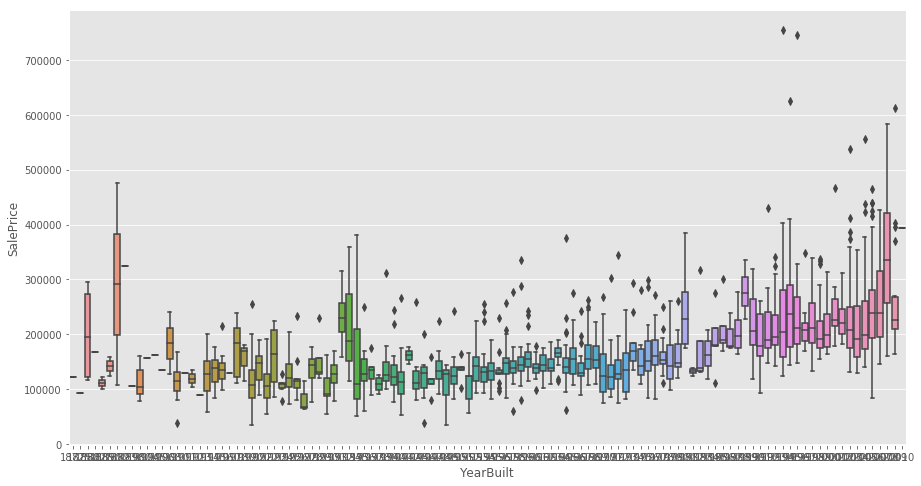

In [4]:
plt.figure(figsize=(15,8))
sns.boxplot(train.YearBuilt, train.SalePrice)

(0, 800000)

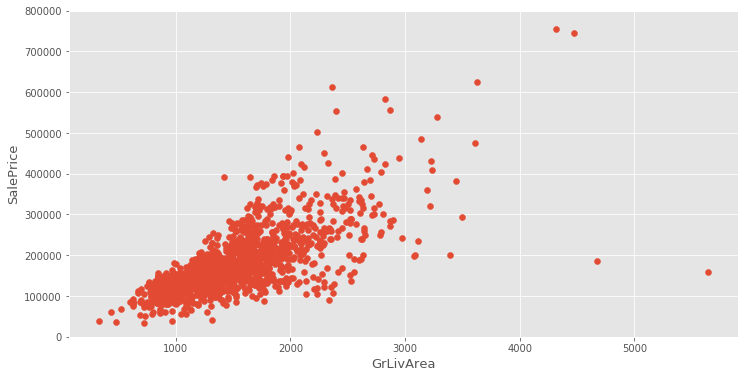

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.ylim(0,800000)


In [6]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace=True)

In [33]:
full = pd.concat([train, test], ignore_index=True)
full.drop('Id',axis=1,inplace=True)
# full.info()

## 数据清洗 
- 空值填充 
- 空值删除 
- 不处理

In [34]:
miss = full.isnull().sum()#统计出空值的个数
miss[miss>0].sort_values(ascending=True)#由低到高排好序

GarageArea         1
SaleType           1
KitchenQual        1
BsmtFinSF1         1
BsmtFinSF2         1
GarageCars         1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
BsmtUnfSF          1
Electrical         1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageQual       159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
Fence           2346
Alley           2719
MiscFeature     2812
PoolQC          2908
dtype: int64

## 空值的填充与删除
### 字符类型填充

In [36]:
cols1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    full[col].fillna("None",inplace=True)

### 数值类型填充

In [38]:
cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    full[col].fillna(0, inplace=True)

### 对lotfrontage的空值进行填充（用这一列的均值）

In [44]:
full["LotFrontage"].fillna(np.mean(full["LotFrontage"]),inplace=True)

### 对这些列进行众数填充

In [45]:
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    full[col].fillna(full[col].mode()[0], inplace=True)

查看哪些是还没填充好的，发现只有test的没有标签列

In [46]:
full.isnull().sum()[full.isnull().sum()>0]##至此我们已经把空值填充好了

SalePrice    1459
dtype: int64

## 数据预处理--字符变成数值型这是很重要的